# SVM
## 1.线性可分支持向量机求解（硬间隔）
## 6.11
$$\begin{aligned}
\max_{\boldsymbol{\alpha}} & \sum_{i=1}^m\alpha_i - \frac{1}{2}\sum_{i = 1}^m\sum_{j=1}^m\alpha_i \alpha_j y_iy_j\boldsymbol{x}_i^T\boldsymbol{x}_j \\
\text { s.t. } & \sum_{i=1}^m \alpha_i y_i =0 \\ 
& \alpha_i \geq 0 \quad i=1,2,\dots ,m
\end{aligned}$$  

### ①KKT条件<sup>[1]</sup>
对于一般地约束优化问题
$$\begin{array}{ll}
{\min } & {f(\boldsymbol x)} \\ 
{\text {s.t.}} & {g_{i}(\boldsymbol x) \leq 0 \quad(i=1, \ldots, m)} \\ 
{} & {h_{j}(\boldsymbol x)=0 \quad(j=1, \ldots, n)}
\end{array}$$
其中，自变量$\boldsymbol x\in \mathbb{R}^n$。设$f(\boldsymbol x),g_i(\boldsymbol x),h_j(\boldsymbol x)$具有连续的一阶偏导数，$\boldsymbol x^*$是优化问题的局部可行解。若该优化问题满足任意一个约束限制条件（constraint qualifications or regularity conditions），则一定存在$\boldsymbol \mu^*=(\mu_1^*,\mu_2^*,...,\mu_m^*)^T,\boldsymbol \lambda^*=(\lambda_1^*,\lambda_2^*,...,\lambda_n^*)^T,$使得
$$\left\{
\begin{aligned}
& \nabla_{\boldsymbol x} L(\boldsymbol x^* ,\boldsymbol \mu^* ,\boldsymbol \lambda^* )=\nabla f(\boldsymbol  x^* )+\sum_{i=1}^{m}\mu_i^* \nabla g_i(\boldsymbol x^* )+\sum_{j=1}^{n}\lambda_j^* \nabla h_j(\boldsymbol x^*)=0 &(1) \\
& h_j(\boldsymbol x^*)=0 &(2) \\
& g_i(\boldsymbol x^*) \leq 0 &(3) \\
& \mu_i^* \geq 0 &(4)\\
& \mu_i^* g_i(\boldsymbol x^*)=0 \space \space(互补松弛条件)&(5)
\end{aligned}
\right.
$$
其中$L(\boldsymbol x,\boldsymbol \mu,\boldsymbol \lambda)$为拉格朗日函数
$$L(\boldsymbol x,\boldsymbol \mu,\boldsymbol \lambda)=f(\boldsymbol x)+\sum_{i=1}^{m}\mu_i g_i(\boldsymbol x)+\sum_{j=1}^{n}\lambda_j h_j(\boldsymbol x)$$

## 参考文献
[1] 南瓜书PumpkinBook <br>
[2] 《机器学习》（西瓜书）<br>
[3] 王书宁 译.《凸优化》 <br>
[4] https://blog.csdn.net/m0_61624005/article/details/122218831 <br>
[5] https://blog.csdn.net/luoshixian099/article/details/51227754 <br>
[6] https://blog.csdn.net/weixin_42001089/article/details/83276714 <br>
[7] 序列最小优化算法 百度百科

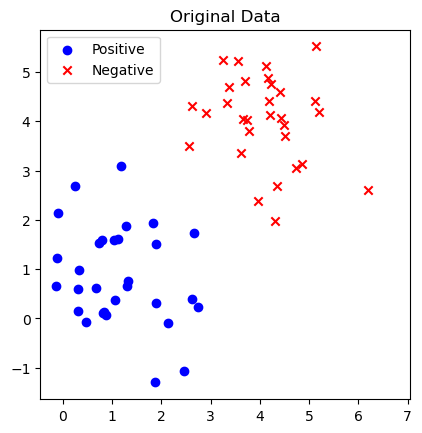

In [381]:
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(1)
m = 60  # 样本数
# 第一组数据
mean_1 = (1, 1)
cov_1 = [[1, 0], [0, 1]]
X_1 = np.random.multivariate_normal(mean_1, cov_1, m//2).T
# 第二组数据
mean_2 = (4, 4)
cov_2 = [[1, 0], [0, 1]]
X_2 = np.random.multivariate_normal(mean_2, cov_2, m//2).T

# 显示数据
plt.scatter(X_1[0,:], X_1[1,:], color='blue', marker='o', label='Positive')
plt.scatter(X_2[0,:], X_2[1,:], color='red', marker='x', label='Negative')
plt.axis('square')
plt.legend(loc='upper left')
plt.title('Original Data')
plt.show()

x = np.concatenate((X_1.T,X_2.T), axis=0)
y = np.concatenate((np.ones((m//2,1)),-np.ones((m//2,1))), axis=0)  # 标记

In [382]:
alphas = np.zeros((m,1))  # 初始化对偶变量
b = 0  # 初始化偏置
eps = 0.01
fx = []
E = []

for i in range(m):
    fx.append(alphas.T * y.T @ x @ x[i,:][:, np.newaxis] + b)
    E.append(fx[i] - y[i])

while True:
    index_1, index_2 = random.sample(range(m),2)
    x1 = x[index_1,:][:,np.newaxis]
    x2 = x[index_2,:][:,np.newaxis]
    eta = x1.T @ x1 + x2.T @ x2 - 2 * x1.T @ x2
    alpha2_new_unclipped = alphas[index_2] + y[index_2]*\
            (E[index_1] - E[index_2]) / eta[0]
    
    if y[index_1] == y[index_2]:  # y_1,y_2同号
        L = 0
        H = alphas[index_1] + alphas[index_2]
    else:
        L = max((0, alphas[index_2] - alphas[index_1]))
        H = float('inf')

    if alpha2_new_unclipped < L:
        alpha2_new = L
    elif L <= alpha2_new_unclipped and alpha2_new_unclipped <= H:
        alpha2_new = alpha2_new_unclipped[0]
    else:
        alpha2_new = H

    alpha1_new = alphas[index_1] + y[index_1] * y[index_2] *\
            (alphas[index_2] - alpha2_new)

    # 计算b和E
    b1_new = -E[index_1] - y[index_1] * x1.T @ x1 *\
        (alpha1_new - alphas[index_1]) - y[index_2] * x2.T @ x1 *\
        (alpha2_new - alphas[index_2]) + b
    b2_new = -E[index_2] - y[index_1] * x1.T @ x2 *\
        (alpha1_new - alphas[index_1]) - y[index_2] * x2.T @ x2 *\
        (alpha2_new - alphas[index_2]) + b
    if alpha1_new > 0:
        b = b1_new[0]
    elif alpha2_new > 0:
        b = b2_new[0]
    else:
        b = ((b1_new + b2_new) / 2.0)[0]

    alphas[index_1] = alpha1_new
    alphas[index_2] = alpha2_new
    for i in range(m):
        fx[i] = (alphas.T * y.T @ x @ x[i,:][:, np.newaxis] + b)[0][0]
        E[i] = (fx[i] - y[i])[0]

    inequality_constraint = 0  # 不等式约束
    num_SV = 0  # 支持向量数目
    for i in range(m):
        if y[i] * fx[i] - 1 >= 0:
            inequality_constraint += 1
        if alphas[i] > 0:
            num_SV += 1
    
    complementary_slackness = 0  # 互补松弛
    if inequality_constraint == m:  # 所有样本正确分类，且在支持超平面外
        for i in range(m):    
            if alphas[i] > 0 and np.absolute(y[i]*fx[i] - 1) < eps:
                complementary_slackness += 1
        if num_SV == complementary_slackness:
            break;
        
    

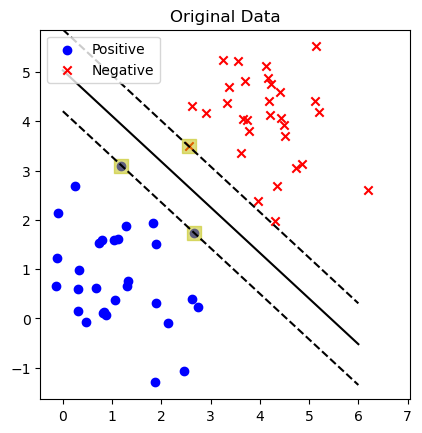

In [383]:
w = (alphas.T * y.T @ x)[0]
plot_x = [0,6]
plot_y = [(-b-w[0]*plot_x[0])/w[1], (-b-w[0]*plot_x[1])/w[1]]
plot_y1 = [(-b-1-w[0]*plot_x[0])/w[1], (-b-1-w[0]*plot_x[1])/w[1]]
plot_y2 = [(-b+1-w[0]*plot_x[0])/w[1], (-b+1-w[0]*plot_x[1])/w[1]]
plt.scatter(X_1[0,:], X_1[1,:], color='blue', marker='o', label='Positive')
plt.scatter(X_2[0,:], X_2[1,:], color='red', marker='x', label='Negative')
plt.axis('square')
plt.legend(loc='upper left')
plt.title('Original Data')
plt.plot(plot_x,plot_y, c='black')
plt.plot(plot_x,plot_y1, c='black', linestyle="--")
plt.plot(plot_x,plot_y2, c='black', linestyle="--")
for i in range(m):
    if alphas[i] > 0:  # 支持向量
        plt.scatter(x[i,0],x[i,1], c='y', marker='s', s=100, alpha=0.5)
plt.show()

## 2.线性不可分支持向量机求解（软间隔）
## 6.40
$$\begin{aligned}
\max_{\boldsymbol{\alpha}}&\sum _{i=1}^m\alpha_i-\frac {1}{2}\sum_{i=1 }^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_j\boldsymbol{x}_i^T\boldsymbol{x}_j \\
 s.t. &\sum_{i=1}^m \alpha_i y_i=0 \\ 
 &  0 \leq\alpha_i \leq C \quad i=1,2,\dots ,m
 \end{aligned}$$


## 6.41
$$\left\{\begin{array}{l}\alpha_{i} \geqslant 0, \quad \mu_{i} \geqslant 0 \\ y_{i} f\left(\boldsymbol{x}_{i}\right)-1+\xi_{i} \geqslant 0 \\ \alpha_{i}\left(y_{i} f\left(\boldsymbol{x}_{i}\right)-1+\xi_{i}\right)=0 \\ \xi_{i} \geqslant 0, \mu_{i} \xi_{i}=0\end{array}\right.$$

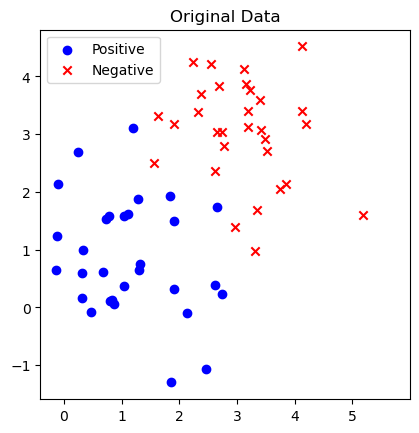

In [384]:
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(1)
m = 60  # 样本数
# 第一组数据
mean_1 = (1, 1)
cov_1 = [[1, 0], [0, 1]]
X_1 = np.random.multivariate_normal(mean_1, cov_1, m//2).T
# 第二组数据
mean_2 = (3, 3)
cov_2 = [[1, 0], [0, 1]]
X_2 = np.random.multivariate_normal(mean_2, cov_2, m//2).T

# 显示数据
plt.scatter(X_1[0,:], X_1[1,:], color='blue', marker='o', label='Positive')
plt.scatter(X_2[0,:], X_2[1,:], color='red', marker='x', label='Negative')
plt.axis('square')
plt.legend(loc='upper left')
plt.title('Original Data')
plt.show()

x = np.concatenate((X_1.T,X_2.T), axis=0)
y = np.concatenate((np.ones((m//2,1)),-np.ones((m//2,1))), axis=0)  # 标记

In [385]:
alphas = np.zeros((m,1))  # 初始化对偶变量
b = 0  # 初始化偏置
eps = 0.01
C = 1  # 惩罚因子
fx = []
E = []

for i in range(m):
    fx.append(alphas.T * y.T @ x @ x[i,:][:, np.newaxis] + b)
    E.append(fx[i] - y[i])

while True:
    index_1, index_2 = random.sample(range(m),2)
    x1 = x[index_1,:][:,np.newaxis]
    x2 = x[index_2,:][:,np.newaxis]
    eta = x1.T @ x1 + x2.T @ x2 - 2 * x1.T @ x2
    alpha2_new_unclipped = alphas[index_2] + y[index_2]*\
            (E[index_1] - E[index_2]) / eta[0]
    
    if y[index_1] == y[index_2]:  # y_1,y_2同号
        L = max(0, alphas[index_1] + alphas[index_2] - C)
        H = min(C, alphas[index_1] + alphas[index_2])
    else:
        L = max((0, alphas[index_2] - alphas[index_1]))
        H = min(C, C + alphas[index_2] - alphas[index_1])

    if alpha2_new_unclipped < L:
        alpha2_new = L
    elif L <= alpha2_new_unclipped and alpha2_new_unclipped <= H:
        alpha2_new = alpha2_new_unclipped[0]
    else:
        alpha2_new = H

    alpha1_new = alphas[index_1] + y[index_1] * y[index_2] *\
            (alphas[index_2] - alpha2_new)

    # 计算b和E
    b1_new = -E[index_1] - y[index_1] * x1.T @ x1 *\
        (alpha1_new - alphas[index_1]) - y[index_2] * x2.T @ x1 *\
        (alpha2_new - alphas[index_2]) + b
    b2_new = -E[index_2] - y[index_1] * x1.T @ x2 *\
        (alpha1_new - alphas[index_1]) - y[index_2] * x2.T @ x2 *\
        (alpha2_new - alphas[index_2]) + b
    if alpha1_new > 0:
        b = b1_new[0]
    elif alpha2_new > 0:
        b = b2_new[0]
    else:
        b = ((b1_new + b2_new) / 2.0)[0]

    alphas[index_1] = alpha1_new
    alphas[index_2] = alpha2_new
    for i in range(m):
        fx[i] = (alphas.T * y.T @ x @ x[i,:][:, np.newaxis] + b)[0][0]
        E[i] = (fx[i] - y[i])[0]

    dissatisfy_kkt_num = 0
    for i in range(m):
        if ((y[i] * E[i] < -eps and alphas[i] < C) or \
            (y[i] * E[i] > eps and alphas[i] > 0)):
            dissatisfy_kkt_num += 1
    
    if dissatisfy_kkt_num == 0:
        break


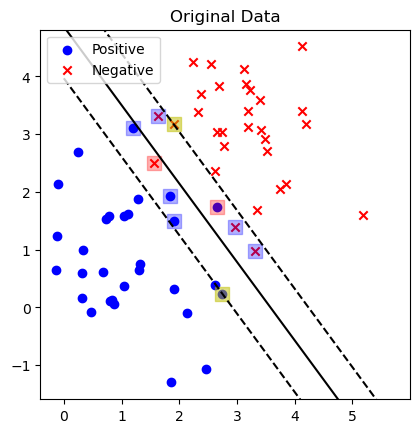

In [386]:
w = (alphas.T * y.T @ x)[0]
plot_x = [0,6]
plot_y = [(-b-w[0]*plot_x[0])/w[1], (-b-w[0]*plot_x[1])/w[1]]
plot_y1 = [(-b-1-w[0]*plot_x[0])/w[1], (-b-1-w[0]*plot_x[1])/w[1]]
plot_y2 = [(-b+1-w[0]*plot_x[0])/w[1], (-b+1-w[0]*plot_x[1])/w[1]]
plt.scatter(X_1[0,:], X_1[1,:], color='blue', marker='o', label='Positive')
plt.scatter(X_2[0,:], X_2[1,:], color='red', marker='x', label='Negative')
plt.axis('square')
plt.legend(loc='upper left')
plt.title('Original Data')
plt.plot(plot_x,plot_y, c='black')
plt.plot(plot_x,plot_y1, c='black', linestyle="--")
plt.plot(plot_x,plot_y2, c='black', linestyle="--")
# 标记错误点
for i in range(m):
    if alphas[i] == C:
        xii = 1 - y[i] * fx[i]
        if xii > 1:  # 错误分类
            plt.scatter(x[i,0],x[i,1], c='r', marker='s', s=100, alpha=0.3)
        else:  # 落在最大间隔内部，正确分类
            plt.scatter(x[i,0],x[i,1], c='b', marker='s', s=100, alpha=0.3)
    elif 0 < alphas[i] and alphas[i] < C:  # 最大间隔边界上
        plt.scatter(x[i,0],x[i,1], c='y', marker='s', s=100, alpha=0.5)
plt.show()